In [155]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [156]:
# loading the data 
df = pd.read_excel('Boston_Housing.xls', usecols=['RM', 'LSTAT','MEDV'])
df.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [157]:
#earlier shape => (506, 14)
df.shape

(506, 3)

In [158]:
# Any missing values => NO
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
RM       506 non-null float64
LSTAT    506 non-null float64
MEDV     506 non-null float64
dtypes: float64(3)
memory usage: 11.9 KB


In [159]:
# outlier => MEDV
df.describe()  

,RM,LSTAT,MEDV
count,506.000000,506.000000,506.000000
mean,6.284634,12.653063,22.532806
std,0.702617,7.141062,9.197104
min,3.561000,1.730000,5.000000
25%,5.885500,6.950000,17.025000
50%,6.208500,11.360000,21.200000
75%,6.623500,16.955000,25.000000
max,8.780000,37.970000,50.000000


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


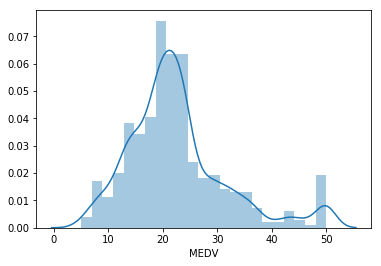

In [160]:
sns.distplot(df['MEDV'])
plt.show()

In [154]:
# 16 outliers removed
df = df.drop(df[df.MEDV==50].index)  
df.shape

(490, 3)

In [136]:
#model split for testing and training - std 75-25% split
X = df.drop('MEDV', axis=1)  
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0)

In [137]:
#modeling using linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
#modeling using support vector regression
svr_model= NuSVR()
svr_model.fit(X_train, Y_train)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [139]:
# model evaluation for training set
y_train_predict = svr_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = svr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 17.818027012673962
R2 score is 0.686026258458938


The model performance for testing set
--------------------------------------
MSE is 30.261656673837972
R2 score is 0.6045180294058023


INFERENCE:
-
after removing outlier and using SVR,
MSE dropped from 35.33 to 19.17,
R2 score improved from 0.55 to 0.66